In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import string

### Coal data

In [2]:
hist_coal_gen = pd.read_csv("../growth_rate/hist_coal_generation.csv")
hist_coal_gen["plot_coal_share"] = hist_coal_gen["Share_Coal_Gen"]*100

for cntry in hist_coal_gen["Code"].unique():
    this_cntry = hist_coal_gen.query("`Code`==@cntry")
    this_cntry = this_cntry.sort_values(by="Year",ascending=False)
    if cntry == hist_coal_gen["Code"].unique()[0]:
        all_last_rows_coal = this_cntry.iloc[[0]]
    else:
        all_last_rows_coal = pd.concat([all_last_rows_coal,this_cntry.iloc[[0]]])

In [3]:
len(hist_coal_gen["Country Code"].unique())

33

In [4]:
hist_coal_gen[hist_coal_gen['Coal_Share_Tran']>0]

,Code,Year,Electricity from solar (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Electricity from gas (TWh),Electricity from coal (TWh),Entity,Electricity generation (TWh),AR6_R10,...,year_since_peak_coal_cap,Gas_Gen_Decline_TWh,Gas_Gen_Decline_Perc,year_since_peak_gas_gen,rate_coal_gen_tot,rate_coal_cap_tot,rate_coal_gen_5y,rate_coal_share_5y,rate_coal_cap_5y,plot_coal_share
22,AUS,2012,2.33,7.39,0.00,47.07,156.29,Australia,233.38,R10PAC_OECD,...,3.0,NaN,0.0,NaN,1.327491,1.479379,1.954707,1.882811,1.410786,66.968035
23,AUS,2013,3.48,9.54,0.00,48.48,142.94,Australia,229.98,R10PAC_OECD,...,4.0,NaN,0.0,NaN,2.028289,1.109534,1.961569,0.892316,1.710747,62.153231
24,AUS,2014,4.01,10.41,0.00,51.32,148.48,Australia,241.61,R10PAC_OECD,...,5.0,NaN,0.0,NaN,1.508635,1.726874,0.037744,0.717539,1.710102,61.454410
25,AUS,2015,5.02,11.45,0.00,45.07,147.06,Australia,230.84,R10PAC_OECD,...,6.0,NaN,0.0,NaN,1.445312,1.756225,-0.995082,0.295077,2.897046,63.706463
26,AUS,2016,6.21,13.70,0.00,46.21,155.96,Australia,246.07,R10PAC_OECD,...,7.0,NaN,0.0,NaN,0.900721,1.855521,-0.463228,0.107001,2.057799,63.380339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,USA,2018,93.36,272.67,807.08,1469.13,1149.49,United States,4201.55,R10NORTH_AM,...,7.0,NaN,0.0,NaN,2.294388,3.288443,4.571062,2.237378,3.093215,27.358713
1041,USA,2019,106.89,295.88,809.41,1585.81,964.96,United States,4158.38,R10NORTH_AM,...,8.0,NaN,0.0,NaN,2.632422,3.472074,3.021204,1.627432,3.068538,23.205190
1042,USA,2020,130.72,337.94,789.88,1624.17,773.39,United States,4043.18,R10NORTH_AM,...,9.0,NaN,0.0,NaN,2.954713,3.467275,3.145451,1.613175,2.928795,19.128260
1043,USA,2021,164.42,378.20,779.65,1579.19,898.00,United States,4153.62,R10NORTH_AM,...,10.0,NaN,0.0,NaN,2.542465,3.368997,NaN,NaN,NaN,21.619696


### Gas data

In [5]:
hist_gas_gen = pd.read_csv("../growth_rate/hist_gas_generation.csv")
hist_gas_gen["plot_gas_share"] = hist_gas_gen["Share_Gas_Gen"]*100

In [6]:
for cntry in hist_gas_gen["Code"].unique():
    this_cntry = hist_gas_gen.query("`Code`==@cntry")
    this_cntry = this_cntry.sort_values(by="Year",ascending=False)
    if cntry == hist_gas_gen["Code"].unique()[0]:
        all_last_rows_gas = this_cntry.iloc[[0]]
    else:
        all_last_rows_gas = pd.concat([all_last_rows_gas,this_cntry.iloc[[0]]])

In [7]:
len(hist_gas_gen["Country Code"].unique())

22

### Label countries

In [8]:
coal_countries = list(hist_coal_gen["Country Code"].unique())
gas_countries = list(hist_gas_gen["Country Code"].unique())
repeat_countries = [x for x in coal_countries if x in gas_countries]

In [9]:
# both coal and gas decline
coal_repeat_index = hist_coal_gen[hist_coal_gen["Code"].isin(repeat_countries)].index
hist_coal_gen.loc[coal_repeat_index,"Type"] = "Coal + gas"

# coal generation reaching 5%
coal_decline = all_last_rows_coal[all_last_rows_coal["Coal_Gen_Decline_Perc"]>95]
coal_decline_countries = coal_decline["Code"].unique()
coal_decline_index = hist_coal_gen[hist_coal_gen["Code"].isin(coal_decline_countries)].index
hist_coal_gen.loc[coal_decline_index,"Type"] = "Coal decline"

hist_coal_gen["Type"] = hist_coal_gen["Type"].fillna("Others")

In [10]:
# define the location of the labels
coal_decline_order = ["BEL","GBR","AUT","PRT"]
coal_decline = coal_decline.set_index("Code")
coal_decline.loc[coal_decline_order,"year_plot"] = [35,35,20,10]
coal_decline.loc[coal_decline_order,"plot1"] = [40,60,50,60]
coal_decline.loc[coal_decline_order,"plot2"] = [100,80,105,105]
coal_decline.loc[coal_decline_order,"plot3"] = [100,80,105,105]
coal_decline.loc[coal_decline_order,"plot4"] = [40,70,50,60]
coal_decline = coal_decline.reset_index("Code")
coal_decline

,Code,Year,Electricity from solar (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Electricity from gas (TWh),Electricity from coal (TWh),Entity,Electricity generation (TWh),AR6_R10,...,rate_coal_cap_tot,rate_coal_gen_5y,rate_coal_share_5y,rate_coal_cap_5y,plot_coal_share,year_plot,plot1,plot2,plot3,plot4
0,AUT,2022,2.73,6.93,0.00,11.76,0.14,Austria,64.69,R10EUROPE,...,4.545455,NaN,NaN,NaN,0.216417,20.0,50.0,105.0,105.0,50.0
1,BEL,2022,7.35,12.07,44.13,23.12,0.04,Belgium,94.58,R10EUROPE,...,4.347826,NaN,NaN,NaN,0.042292,35.0,40.0,100.0,100.0,40.0
2,PRT,2022,3.07,13.27,0.00,17.36,0.06,Portugal,46.96,R10EUROPE,...,4.347826,NaN,NaN,NaN,0.127768,10.0,60.0,105.0,105.0,60.0
3,GBR,2022,13.91,79.98,48.16,127.55,5.23,United Kingdom,324.89,R10EUROPE,...,3.713171,NaN,NaN,NaN,1.609776,35.0,60.0,80.0,80.0,70.0


In [11]:
# both coal and gas decline
gas_repeat_index = hist_gas_gen[hist_gas_gen["Code"].isin(repeat_countries)].index
hist_gas_gen.loc[gas_repeat_index,"Type"] = "Coal + gas"

# gas generation reaching 5%
gas_decline = all_last_rows_gas[all_last_rows_gas["Gas_Gen_Decline_Perc"]>90]
gas_decline_countries = gas_decline["Country Code"].unique()
gas_decline_index = hist_gas_gen[hist_gas_gen["Country Code"].isin(gas_decline_countries)].index
hist_gas_gen.loc[gas_decline_index,"Type"] = "Gas decline"

hist_gas_gen["Type"] = hist_gas_gen["Type"].fillna("Others")

In [12]:
# define the location of the labels
gas_decline_order = ["UKR","FIN"]
gas_decline = gas_decline.set_index("Code")
gas_decline.loc[gas_decline_order,"year_plot"] = [35,22]
gas_decline.loc[gas_decline_order,"plot1"] = [30,40]
gas_decline.loc[gas_decline_order,"plot2"] = [90,90]
gas_decline = gas_decline.reset_index("Code")
gas_decline

,Code,Year,Electricity from solar (TWh),Electricity from wind (TWh),Electricity from nuclear (TWh),Electricity from gas (TWh),Electricity from coal (TWh),Entity,Electricity generation (TWh),AR6_R10,...,Gas_Gen_Decline_TWh,Gas_Gen_Decline_Perc,year_since_peak_gas_gen,rate_gas_gen_tot,rate_gas_gen_5y,rate_gas_share_5y,plot_gas_share,year_plot,plot1,plot2
0,FIN,2022,0.30,12.10,25.06,1.32,2.97,Finland,72.99,R10EUROPE,...,12.53,90.469314,19.0,4.761543,NaN,NaN,1.808467,22.0,40.0,90.0
1,UKR,2022,5.97,1.22,64.99,4.60,22.18,Ukraine,111.94,R10REF_ECON,...,45.29,90.779715,32.0,2.836866,NaN,NaN,4.109344,35.0,30.0,90.0


### Visualization

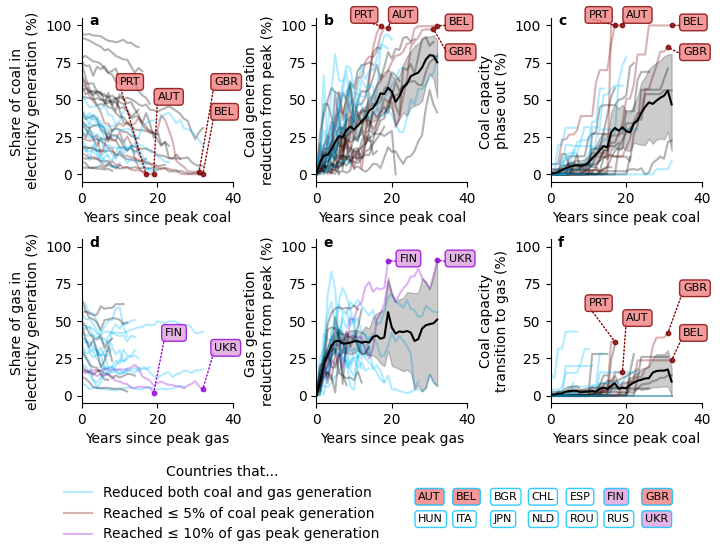

In [13]:
fig, axes = plt.subplots(2,3,figsize=(8,5))
fig.subplots_adjust(wspace=0.55,hspace=0.35)

##### COAL
coal_y_vals = ['plot_coal_share','Coal_Gen_Decline_Perc','Coal_Share_PhasedOut',"Coal_Share_Tran"]
coal_x_vals = ["year_since_peak_coal_gen","year_since_peak_coal_gen",
               "year_since_peak_coal_gen","year_since_peak_coal_gen"]
coal_y_labels = ["Share of coal in \nelectricity generation (%)",
                 "Coal generation \nreduction from peak (%)",
                "Coal capacity \nphase out (%)","Coal capacity\ntransition to gas (%)"]
coal_y_vals_labels = ["plot1","plot2","plot3","plot4"]
plot_data = hist_coal_gen[hist_coal_gen["year_since_peak_coal_gen"]>=0]
coal_palette = plot_data["Type"].replace("Others","black").replace("Coal + gas","deepskyblue").replace("Gas decline","darkviolet").replace("Coal decline","maroon").unique()
for coal_y in coal_y_vals:
    m = coal_y_vals.index(coal_y)
    coal_x = coal_x_vals[m]
    coal_label = coal_y_labels[m]
    coal_y_label = coal_y_vals_labels[m]
    if m <3:
        this_ax = axes[0,m]
    else:
        this_ax = axes[1,2]
    sns.lineplot(x=coal_x,y=coal_y,data=plot_data, hue="Type",palette = list(coal_palette), units="Country Code",
                 estimator=None,alpha=0.3,zorder=1,legend=None,ax=this_ax)
    if m != 0:
        sns.lineplot(x=coal_x,y=coal_y,data=plot_data,
                     color="black",zorder=1,legend=None,ax=this_ax)
    this_ax.scatter(coal_decline[coal_x],coal_decline[coal_y],color="maroon",s=10,alpha=0.8)
    x = list(coal_decline["year_plot"])
    y = list(coal_decline[coal_y_label])
    x0 = list(coal_decline[coal_x])
    y0 = list(coal_decline[coal_y])
    cntry = list(coal_decline["Country Code"])
    for i in np.arange(len(x)):
        this_ax.text(x[i],y[i],cntry[i], horizontalalignment='left',fontsize=8,color="black",
                    bbox=dict(facecolor='lightcoral', edgecolor="maroon",boxstyle='round',alpha=0.8))
        this_ax.annotate(text="", xy=(x[i],y[i]),xytext=(x0[i],y0[i]), 
                     arrowprops=dict(arrowstyle='-',color="maroon",lw=1,linestyle=":"),zorder=1)
    this_ax.set_ylabel(coal_label)
    this_ax.set_xlabel("Years since peak coal")
    this_ax.set_xlim([0,40])
    this_ax.set_ylim([-5,105])
    
#sns.lineplot(x="year_since_peak_coal_gen",y="Coal_Share_Tran",data=plot_data, hue="Type",palette = list(coal_palette), units="Country Code",
#                estimator=None,alpha=0.3,zorder=1,legend=None,ax=axes[1,2])

### GAS
gas_y_vals = ['plot_gas_share','Gas_Gen_Decline_Perc']
gas_x_vals = ["year_since_peak_gas_gen","year_since_peak_gas_gen"]
gas_y_labels = ["Share of gas in \nelectricity generation (%)",
                 "Gas generation \nreduction from peak (%)"]
gas_y_vals_labels = ["plot1","plot2"]
plot_gas = hist_gas_gen[hist_gas_gen["year_since_peak_gas_gen"]>=0]
gas_palette = plot_gas["Type"].replace("Others","black").replace("Coal + gas","deepskyblue").replace("Gas decline","darkviolet").replace("Coal decline","maroon").unique()
for gas_y in gas_y_vals:
    n = gas_y_vals.index(gas_y)
    gas_x = gas_x_vals[n]
    gas_label = gas_y_labels[n]
    gas_y_label = gas_y_vals_labels[n]
    sns.lineplot(x=gas_x,y=gas_y,data=plot_gas,hue="Type",palette = list(gas_palette),units="Country Code",
                 estimator=None,alpha=0.3,zorder=1,legend=None,ax=axes[1,n])
    if n != 0:
        sns.lineplot(x=gas_x,y=gas_y,data=plot_gas,
                     color="black",zorder=1,legend=None,ax=axes[1,n])
    axes[1,n].scatter(gas_decline[gas_x],gas_decline[gas_y],color="darkviolet",s=10,alpha=0.8)
    x = list(gas_decline["year_plot"])
    y = list(gas_decline[gas_y_label])
    x0 = list(gas_decline[gas_x])
    y0 = list(gas_decline[gas_y])
    cntry = list(gas_decline["Country Code"])
    for i in np.arange(len(x)):
        axes[1,n].text(x[i],y[i],cntry[i], horizontalalignment='left',fontsize=8,color="black",
                    bbox=dict(facecolor='plum', edgecolor="darkviolet",boxstyle='round',alpha=0.8))
        axes[1,n].annotate(text="", xy=(x[i],y[i]),xytext=(x0[i],y0[i]), 
                     arrowprops=dict(arrowstyle='-',color="darkviolet",lw=1,linestyle=":"),zorder=1)
    axes[1,n].set_ylabel(gas_label)
    axes[1,n].set_xlabel("Years since peak gas")
    axes[1,n].set_xlim([0,40])
    axes[1,n].set_ylim([-5,105])

# add label
count = 0
axis_labels = ["a","b","c","d","e","f"]
for ax in axes.reshape(-1): 
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.text(2,100,axis_labels[count], weight='bold')
    count = count+1
    
# add country names 
repeat_countries = sorted(repeat_countries)
for b in np.arange(len(repeat_countries)):
    if b > 6:
        b_val = b-7
        b_yval = -85
    else:
        b_val = b
        b_yval = -70
    x_both = -35+b_val*10
    
    if repeat_countries[b] in coal_decline_countries:
        face_color = "lightcoral"
    elif repeat_countries[b] in gas_decline_countries:
        face_color = "plum"
    else:
        face_color = "white"
    
    axes[1,2].text(x_both,b_yval,repeat_countries[b], horizontalalignment='left',fontsize=8,color="black",
                    bbox=dict(facecolor=face_color, edgecolor="deepskyblue",boxstyle='round',alpha=0.8))
#axes[1,2].set_axis_off()
axes[1,2]

axes[1,1].legend(handles=[Line2D([0], [0], label='Reduced both coal and gas generation', color='deepskyblue',alpha=0.3),
                         Line2D([0], [0], label='Reached ≤ 5% of coal peak generation', color='maroon',alpha=0.3),
                         Line2D([0], [0], label='Reached ≤ 10% of gas peak generation', color='darkviolet',alpha=0.3),],
                bbox_to_anchor=(0.5, -0.3),title="Countries that...",frameon=False)
fig.savefig("Fig2_country_progress.png",dpi=600, bbox_inches='tight')
fig.savefig("Fig2_country_progress.pdf")

### Alternative plots

In [14]:
plot_gas = hist_gas_gen[hist_gas_gen["year_since_peak_gas_gen"]>=0]

choose_country_df = hist_gas_gen[hist_gas_gen["year_since_peak_gas_gen"]==0]
choose_country_df = choose_country_df[choose_country_df["Year"]>2005]
choose_country = np.concatenate([choose_country_df.query("AR6_R10=='R10EUROPE'")["Code"].unique(),["CHL"]])

#choose_country = ["CHL"]
plot_gas_notChoose = plot_gas[plot_gas["Code"].isin(choose_country)==False]
plot_gas_Choose = plot_gas[plot_gas["Code"].isin(choose_country)]

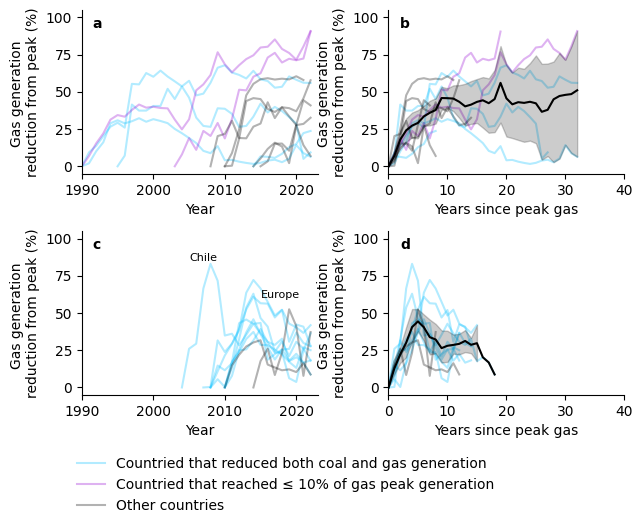

In [15]:
fig, axes = plt.subplots(2,2,figsize=(7,5))
fig.subplots_adjust(wspace=0.3,hspace=0.35)

sns.lineplot(x="Year",y="Gas_Gen_Decline_Perc",data=plot_gas_notChoose,alpha=0.3,hue="Type",palette = list(gas_palette),
             units="Country Code",estimator=None,zorder=1,ax=axes[0,0],legend=None)
sns.lineplot(x="year_since_peak_gas_gen",y="Gas_Gen_Decline_Perc",data=plot_gas_notChoose,alpha=0.3,hue="Type",palette = list(gas_palette),
             units="Country Code",estimator=None,zorder=1,ax=axes[0,1],legend=None)
sns.lineplot(x="year_since_peak_gas_gen",y="Gas_Gen_Decline_Perc",data=plot_gas_notChoose,
                     color="black",zorder=1,legend=None,ax=axes[0,1])
axes[0,0].set_ylim([-5,105])
axes[0,0].set_xlim([1990,2023])
axes[0,0].text(1991.5,93,"a",weight="bold")
axes[0,1].set_ylim([-5,105])
axes[0,1].set_xlim([0,40])
axes[0,1].set_xlabel("Years since peak gas")
axes[0,1].text(2,93,"b",weight="bold")

sns.lineplot(x="Year",y="Gas_Gen_Decline_Perc",data=plot_gas_Choose,alpha=0.3,hue="Type",palette = ['deepskyblue', 'black'],
             units="Country Code",estimator=None,zorder=1,ax=axes[1,0],legend=None)
sns.lineplot(x="year_since_peak_gas_gen",y="Gas_Gen_Decline_Perc",data=plot_gas_Choose,alpha=0.3,hue="Type",palette = ['deepskyblue', 'black'],
             units="Country Code",estimator=None,zorder=1,ax=axes[1,1],legend=None)
sns.lineplot(x="year_since_peak_gas_gen",y="Gas_Gen_Decline_Perc",data=plot_gas_Choose,
                     color="black",zorder=1,legend=None,ax=axes[1,1])
axes[1,0].set_ylim([-5,105])
axes[1,0].set_xlim([1990,2023])
axes[1,0].text(2005,85,"Chile",color="black",size=8)
axes[1,0].text(2015,60,"Europe",color="black",size=8)
axes[1,0].text(1991.5,93,"c",weight="bold")
axes[1,1].set_ylim([-5,105])
axes[1,1].set_xlim([0,40])
axes[1,1].set_xlabel("Years since peak gas")
axes[1,1].text(2,93,"d",weight="bold")

axes[1,1].legend(handles=[Line2D([0], [0], label='Countried that reduced both coal and gas generation', color='deepskyblue',alpha=0.3),
                         Line2D([0], [0], label='Countried that reached ≤ 10% of gas peak generation', color='darkviolet',alpha=0.3),
                         Line2D([0], [0], label='Other countries', color='black',alpha=0.3)],
                bbox_to_anchor=(0.5, -0.3),frameon=False)

for ax in axes.reshape(-1): 
    ax.set_ylabel("Gas generation \nreduction from peak (%)")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
fig.savefig("ExtDataFig2.png",dpi=600, bbox_inches='tight')